In [1]:
import pip
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
def myFourierSeries(fs_signal, h_signal, len_signal, k_max_signal):
    """
    Parameters
    ----------
    fs_signal:    int,    Sampling frequency of the signal
    h_signal:     double, Amplitude
    len_signal:   int,    Signal length in seconds
    k_max_signal: int,    variable Fourier Series length

    Returns
    ---------
    f:            array[double], Fourier Series of a square signal
    """

    # Generate evenly spaced timestamps
    #x = np.linspace(0, len_signal, fs_signal, endpoint=False) 
    time = np.arange(0, len_signal, 1/fs)   # Create vector from 0 to 1 - stepsize = 1/fs
    
    # This will be our resulting signal
    f = np.zeros([len_signal])

    # Go over all samples for our signal and calculate its value via fourier series
    for x in range(0, len_signal):

      # The inner sum - see RHS of formula
      sum = 0
      for k in range(1, k_max_signal+1, 2):
        sum += k**(-1) * np.sin(2 * np.pi * k * time[x] )
            
      # The scalar in front of the sum - see RHS of formula
      f[x] =  sum * 4 * h_signal * np.pi**(-1)
    
    return f 

In [4]:
# create square wave signal
length = 1           # seconds
fs = 100             # Hz - Sampling Frequency
f = 5                # Hz - Frequency of the signal
amplitude = 1        # Amplitude (units e.g Volts)
k_max_signal = 21    # The "depth" of the Fourier Series

# Create vector from 0 to 1 - stepsize = 1/fs
# Calculate evenly spaced numbers over a specified interval.
t = np.linspace(0, length, fs, endpoint=False)

# Fourier series of a square signal
x = myFourierSeries(fs, amplitude, t.shape[0], k_max_signal)

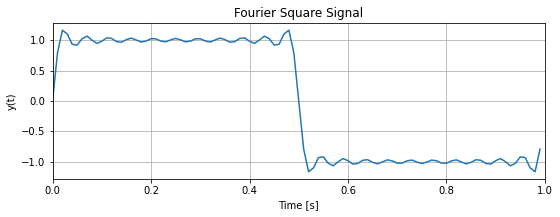

In [5]:
# Our plots
plots = [(0, length, t, "Fourier Square Signal", x)]

# Define Figure Size
plt.figure(figsize=(30,10))

# Print the plots
i = 1
for (lower_x_lim, upper_x_lim, y_axis, title, plot) in plots:
  plt.subplot(3, 3, i)
  plt.plot(y_axis, plot)
  plt.title(title)
  plt.xlim(lower_x_lim, upper_x_lim)
  
  plt.xlabel('Time [s]')
  plt.ylabel('y(t)')
  plt.grid()

  i+=1

# Formatting of the plots, margin
plt.subplots_adjust(left=0.125,
                  bottom=0.1, 
                  right=0.9, 
                  top=0.9, 
                  wspace=0.2, 
                  hspace=0.35)

In [6]:
# Calculate FFT
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), 1/fs)

In [7]:
# Upsampling
# 0 er Array erstellen
l_upsampling = 5
np.zeros(fs * l_upsampling)

# Add zeros
X_upsampled = np.insert(X, int(X.shape[0]/2), np.zeros(fs * l_upsampling)) 

# Inverse FFT
x_upsampled = np.fft.ifft(X_upsampled)

# Create vector from 0 to 1 - stepsize = 1/fs
t_upsampled = np.linspace(0, length, fs + fs * l_upsampling)

# Calculate x values for new f>-domain
X_x = np.linspace(- int(X_upsampled.shape[0]/2), int(X_upsampled.shape[0]/2), fs + fs * l_upsampling)

C:\Users\nero\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


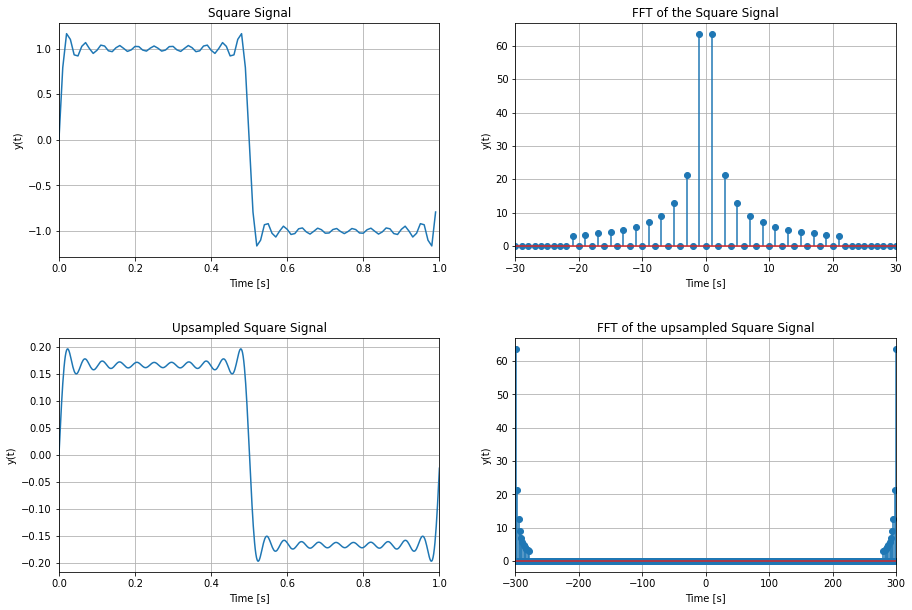

In [8]:
# Our plots
plots = [('plot', 0, length, t, "Square Signal", x),
         ('stem', -30, 30, freq, "FFT of the Square Signal", np.abs(X)),
         ('plot', 0, length, t_upsampled, "Upsampled Square Signal", x_upsampled),
         ('stem', - int(X_upsampled.shape[0]/2), int(X_upsampled.shape[0]/2), X_x, "FFT of the upsampled Square Signal", np.abs(X_upsampled))      
        ]

# Define Figure Size
plt.figure(figsize=(15,15))


# Print the plots
i = 1
for (plot_type, lower_x_lim, upper_x_lim, y_axis, title, plot) in plots:
    plt.subplot(3, 2, i)

    if plot_type == 'plot':
        plt.plot(y_axis, plot)
    elif plot_type == 'stem':
        plt.stem(y_axis, plot)
        
    plt.title(title)
    plt.xlim(lower_x_lim, upper_x_lim)
    plt.xlabel('Time [s]')
    plt.ylabel('y(t)')
    plt.grid()

    i+=1

# Formatting of the plots, margin
plt.subplots_adjust(left=0.125,
                  bottom=0.1, 
                  right=0.9, 
                  top=0.9, 
                  wspace=0.2, 
                  hspace=0.35)